In [2]:
from astroquery.gaia import Gaia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Modified ADQL Query: Targets a specific sky region (RA between 0 and 10 degrees)
my_query = """
SELECT TOP 500000
       source_id, parallax, parallax_over_error, 
       phot_g_mean_mag, bp_rp
FROM   gaiadr3.gaia_source
WHERE  parallax IS NOT NULL
  AND  parallax > 1.0               
  AND  parallax_over_error > 5       
  AND  bp_rp IS NOT NULL             
  AND  phot_g_mean_mag IS NOT NULL   
  AND  ra BETWEEN 0 AND 10          -- Filters by a small, specific celestial area
"""

In [7]:
from astroquery.gaia import Gaia

# Launch the query to the Gaia server
job = Gaia.launch_job_async(my_query)
results = job.get_results()

# Convert the results to a Pandas DataFrame for analysis
data = results.to_pandas()

print(f"Downloaded {len(data)} stars.")
print(data.head())

INFO: Query finished. [astroquery.utils.tap.core]
Downloaded 500000 stars.
            source_id  parallax  parallax_over_error  phot_g_mean_mag  \
0  423288753816716544  1.615124            99.691246        14.434653   
1  423288783871322240  2.237117            14.614492        18.676018   
2  423288921310071040  1.006694            16.390169        17.107557   
3  423288994334899072  1.108838            46.211178        15.384709   
4  423289028694634112  6.704084           157.582596        16.429653   

      bp_rp  
0  1.109321  
1  2.483051  
2  1.635139  
3  1.179366  
4  2.709688  


In [8]:
# Calculate Absolute Magnitude (M_G)
# The calculation is M_G = G + 5 * log10(parallax) - 10, where parallax is in mas
data['M_G'] = data['phot_g_mean_mag'] + 5 * np.log10(data['parallax']) - 10

print("Calculated M_G column:")
print(data[['parallax', 'phot_g_mean_mag', 'M_G']].head())

Calculated M_G column:
   parallax  phot_g_mean_mag        M_G
0  1.615124        14.434653   5.475683
1  2.237117        18.676018  10.424461
2  1.006694        17.107557   7.122044
3  1.108838        15.384709   5.609050
4  6.704084        16.429653  10.561350


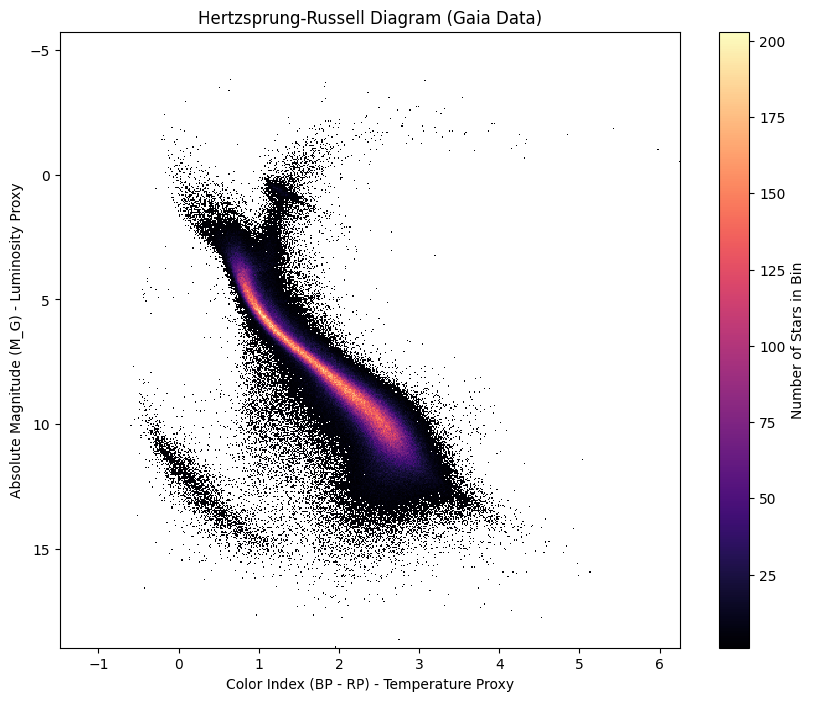

In [9]:
plt.figure(figsize=(10, 8))

# Plot the Color Index (bp_rp) against Absolute Magnitude (M_G)
plt.hist2d(data['bp_rp'], data['M_G'], 
           bins=500, cmin=1, cmap='magma') 

# CRITICAL: Invert the Y-axis so brighter stars (smaller numbers) are at the top
plt.gca().invert_yaxis()

plt.title('Hertzsprung-Russell Diagram (Gaia Data)')
plt.xlabel('Color Index (BP - RP) - Temperature Proxy')
plt.ylabel('Absolute Magnitude (M_G) - Luminosity Proxy')
plt.colorbar(label='Number of Stars in Bin')
plt.show()